In [1]:
Sys.Date()

[1] "2019-06-29"

In [2]:
library(tidyverse)
library(Matrix)
library(extrafont)
library(gridExtra)

── Attaching packages ────────────────────────────────── tidyverse 1.2.1.9000 ──
✔ ggplot2 3.2.0.9000     ✔ purrr   0.3.2.9000
✔ tibble  2.1.3.9000     ✔ dplyr   0.8.2     
✔ tidyr   0.8.3.9000     ✔ stringr 1.4.0.9000
✔ readr   1.3.1.9000     ✔ forcats 0.4.0.9000
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘Matrix’

The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack

Registering fonts with R

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



# Data loading

In [3]:
gene_symbols <- read.table(file = "../data/genes.tsv",
                           header = FALSE,
                           row.names = 1,
                           stringsAsFactors = FALSE)
gene_symbols <- setNames(gene_symbols[[1]], rownames(gene_symbols))

In [4]:
embedding_tsne <- readRDS(file = "../data/embedding_tsne.rds")

In [5]:
expr_readcount_use <- readRDS(file = "../data/expr_readcount_bl17.rds")

# Visualization

## Visualizing clustering

In [6]:
cluster_labels <-
    embedding_tsne %>% group_by(cluster) %>% select(x, y) %>%
    summarise(x = median(x), y = median(y)) %>% as.data.frame

Adding missing grouping variables: `cluster`


In [7]:
p_clusters <-
    ggplot(embedding_tsne, aes(x, y,
                               color = cluster)) +
        geom_point(size = 0.8, stroke = 0, shape = 16) +
        theme_void() +
        labs(x = 'Dimension 1',
             y = 'Dimension 2') +
        annotate("text",
                 x = cluster_labels[, "x"],
                 y = cluster_labels[, "y"], label = cluster_labels[, 1],
                 family = "Arial",
                 size = 2,
                 color = "black") +
        guides(color = FALSE) +
        theme(panel.border = element_rect(color = "grey70",
                                              size = .4,
                                              fill = NA))

## Visualizing Tnnt2 expression

In [8]:
if (! exists("expr_cpm_use")) {
    expr_cpm_use <- as(expr_readcount_use, "dgCMatrix")

    expr_cpm_use@x <- 1000000 *
        (expr_cpm_use@x / rep.int(Matrix::colSums(expr_cpm_use),
                                  diff(expr_cpm_use@p)))
}

In [9]:
customized_theme_style <- function(x) {
    
    theme(panel.border = element_rect(color = "grey70",
                                      size = .4,
                                      fill = NA),
          legend.justification = c(1, 0), legend.position = c(.94, .07),
          legend.text = element_text(family = "Arial",
                                     size = 4,
                                     margin = margin(t = 0, r = 0,
                                                     b = 0, l = -1.8,
                                                     unit = "mm")),
          legend.key.size = unit(1.5, "mm"),
          legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "mm"))
}

In [10]:
# Tnnt2

grep("Tnnt2", gene_symbols, ignore.case = TRUE, value = TRUE)
selected_gene <- paste("ENSMUSG00000026414", "Tnnt2", sep = "_")

p_color_Tnnt2 <-
    embedding_tsne %>%
    mutate(cell = rownames(.),
           gene_expr = log10(expr_cpm_use[selected_gene, cell] + 1)) %>%
    arrange(gene_expr) %>%
    ggplot(aes(x, y,
           color = gene_expr)) +
    geom_point(size = 0.8, stroke = 0, shape = 16) +
    scale_color_viridis_c(direction = 1) +
    theme_void() +
    labs(x = 'Dimension 1',
         y = 'Dimension 2',
         color = NULL) +
    # guides(color = FALSE) +
    customized_theme_style()

ENSMUSG00000026414 
           "Tnnt2"

## Visualizing clustering and expression of cardiomyocytes

In [11]:
embedding_tsne <- readRDS(file = "../data/clustering_CMs/embedding_tsne.rds")

In [12]:
cluster_labels <-
    embedding_tsne %>% group_by(cluster) %>% select(x, y) %>%
    summarise(x = median(x), y = median(y)) %>% as.data.frame

Adding missing grouping variables: `cluster`


In [13]:
p_clusters_cms <-
    ggplot(embedding_tsne, aes(x, y,
                               color = cluster)) +
    geom_point(size = 1, stroke = 0, shape = 16) +
    theme_void() +
    labs(x = 'Dimension 1',
         y = 'Dimension 2') +
    annotate("text",
             x = cluster_labels[, "x"],
             y = cluster_labels[, "y"], label = cluster_labels[, 1],
             family = "Arial",
             size = 2,
             color = "black") +
    guides(color = FALSE) +
    theme(panel.border = element_rect(color = "grey70",
                                      size = .4,
                                      fill = NA))

In [14]:
plot_embedding_expr <- function(embedding,
                                expr_cpm,
                                gene,
                                label) {
    
    embedding %>% 
        mutate(cell = rownames(.),
               gene_expr = log10(expr_cpm[gene, cell] + 1)) %>% 
        arrange(gene_expr) %>%
        ggplot(aes(x, y,
                   color = gene_expr)) +
        geom_point(size = 0.8, stroke = 0, shape = 16) +
        scale_color_viridis_c(direction = 1) +
        theme_void() +
        labs(x = 'Dimension 1',
             y = 'Dimension 2',
             color = NULL) +
        # guides(color = FALSE) +
        theme(panel.border = element_rect(color = "grey70",
                                          size = .4,
                                          fill = NA),
              legend.justification = c(1, 0), legend.position = c(.94, .04),
              legend.text = element_text(family = "Arial",
                                         size = 4,
                                         margin = margin(t = 0, r = 0,
                                                         b = 0, l = -1.8,
                                                         unit = "mm")),
              legend.key.size = unit(1.5, "mm"),
              legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "mm")) +
        annotate("text",
                 x = 42,
                 y = 55,
                 family = "Arial",
                 label = label,
                 color = "black",
                 size = 2.2,
                 vjust = "inward", hjust = "center")
    
}

In [15]:
# Nppa
grep("Nppa", gene_symbols, ignore.case = TRUE, value = TRUE)
selected_gene <- paste("ENSMUSG00000041616", "Nppa", sep = "_")

p_color_Nppa <- 
    plot_embedding_expr(embedding = embedding_tsne,
                                    expr_cpm = expr_cpm_use,
                                    gene = selected_gene,
                                    label = "Nppa\n") 

ENSMUSG00000041616 
            "Nppa"

In [16]:
# Myl2
grep("Myl2", gene_symbols, ignore.case = TRUE, value = TRUE)
selected_gene <- paste("ENSMUSG00000013936", "Myl2", sep = "_")

p_color_Myl2 <- 
    plot_embedding_expr(embedding = embedding_tsne,
                                    expr_cpm = expr_cpm_use,
                                    gene = selected_gene,
                                    label = "Myl2\n") 

ENSMUSG00000013936 
            "Myl2"

In [17]:
# Gja5
grep("Gja5", gene_symbols, ignore.case = TRUE, value = TRUE)
selected_gene <- paste("ENSMUSG00000057123", "Gja5", sep = "_")

p_color_Gja5 <- 
    plot_embedding_expr(embedding = embedding_tsne,
                                    expr_cpm = expr_cpm_use,
                                    gene = selected_gene,
                                    label = "Gja5\n(Cx40)") 

ENSMUSG00000057123 
            "Gja5"

In [18]:
# Gjc1
grep("Gjc1", gene_symbols, ignore.case = TRUE, value = TRUE)
selected_gene <- paste("ENSMUSG00000034520", "Gjc1", sep = "_")

p_color_Gjc1 <- 
    plot_embedding_expr(embedding = embedding_tsne,
                                    expr_cpm = expr_cpm_use,
                                    gene = selected_gene,
                                    label = "Gjc1\n(Cx45)") 

ENSMUSG00000034520 
            "Gjc1"

In [19]:
# Gja1
grep("Gja1", gene_symbols, ignore.case = TRUE, value = TRUE)
selected_gene <- paste("ENSMUSG00000050953", "Gja1", sep = "_")

p_color_Gja1 <- 
    plot_embedding_expr(embedding = embedding_tsne,
                                    expr_cpm = expr_cpm_use,
                                    gene = selected_gene,
                                    label = "Gja1\n(Cx43)") 

ENSMUSG00000051056 ENSMUSG00000050953 
           "Gja10"             "Gja1"

In [20]:
# adjust expr for Gjd3, due to improved annotation
aln_info_Gjd3 <-
    read.table("../data/aln_Gjd3_possorted_genome_bam_11_98981288_98983682.bam.txt",
               header = TRUE,
               sep = "\t",
               stringsAsFactors = FALSE)


cells_Gjd3 <- aln_info_Gjd3 %>%
    filter(MAPPING_QUALITY == 255) %>%
    filter(CELL_BARCODE != "NA") %>%
    mutate(CELL_BARCODE2 = paste("BL17", CELL_BARCODE,
                                 UMI_BARCODE,
                                 sep = "_")) %>%
    .$CELL_BARCODE2

cells_Gjd3_count <- table(cells_Gjd3)
names(cells_Gjd3_count) <- str_replace(names(cells_Gjd3_count),
                                       "_[A-Z]{10}$", "")

cells_Gjd3_count <- cells_Gjd3_count[names(cells_Gjd3_count) %in% rownames(embedding_tsne)]

expr_readcount_edited <- as.matrix(expr_readcount_use[, rownames(embedding_tsne)])
expr_readcount_edited["ENSMUSG00000047197_Gjd3", names(cells_Gjd3_count)] <- cells_Gjd3_count
expr_readcount_edited <- Matrix(expr_readcount_edited, sparse = TRUE)


expr_cpm_edited <- expr_readcount_edited
expr_cpm_edited@x <- 1000000 *
    (expr_cpm_edited@x / rep.int(Matrix::colSums(expr_cpm_edited),
                                 diff(expr_cpm_edited@p)))

In [21]:
p_color_Gjd3 <- 
    plot_embedding_expr(embedding = embedding_tsne,
                                    expr_cpm = expr_cpm_edited,
                                    gene = "ENSMUSG00000047197_Gjd3",
                                    label = "Gjd3\n(Cx30.2)") 

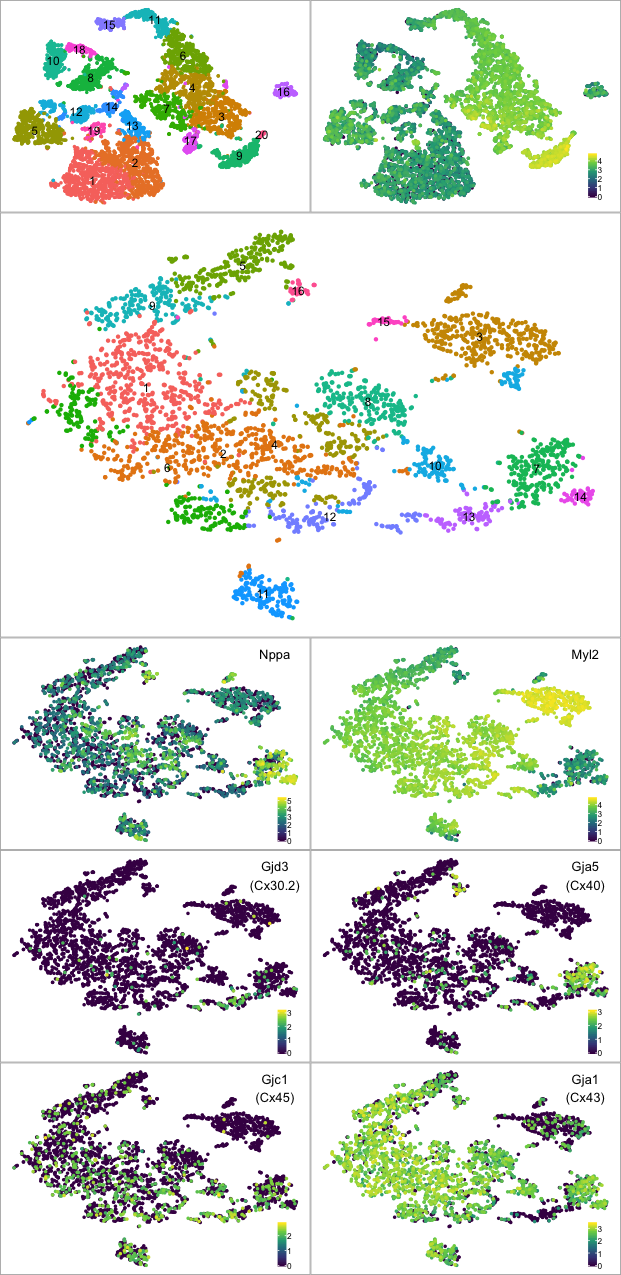

In [22]:
options(repr.plot.width = 4.14, repr.plot.height = 8.5, repr.plot.res = 150)

p_combined <- 
    grid.arrange(grobs = list(p_clusters,
                              p_color_Tnnt2,
                              p_clusters_cms,
                              p_color_Nppa,
                              p_color_Myl2,
                              p_color_Gjd3,
                              p_color_Gja5 ,
                              p_color_Gjc1,
                              p_color_Gja1),
                 n = 2,
                 layout_matrix = rbind(c(1, 2),
                                       c(3, 3),
                                       c(3, 3),
                                       c(4, 5),
                                       c(6, 7),
                                       c(8, 9)))

# Information about the current R session

In [23]:
if (require(devtools)) {
    session_info()
} else {
    sessionInfo()
}

Loading required package: devtools


─ Session info ───────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 3.6.0 (2019-04-26)
 os       macOS Mojave 10.14.5        
 system   x86_64, darwin18.6.0        
 ui       unknown                     
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/Chicago             
 date     2019-06-29                  

─ Packages ───────────────────────────────────────────────────────────────────
 package     * version     date       lib source                               
 assertthat    0.2.1       2019-03-21 [1] CRAN (R 3.6.0)                       
 backports     1.1.4       2019-04-10 [1] CRAN (R 3.6.0)                       
 base64enc     0.1-3       2015-07-28 [1] CRAN (R 3.6.0)                       
 broom         0.5.2.9001  2019-06-26 [1] Github (tidymodels/broom@59da347)    
 callr         3.2.0.9001  2019-06-23 [1] Github (r